## Setup

In [1]:
import warnings; warnings.simplefilter('ignore')
import os
import matplotlib.pyplot as plt
import numpy as np
from counterfactuals.descriptor import RandomSampleDescriptor

## Create some toy data

In [2]:
rd = RandomSampleDescriptor()
rd.load_all(method='really_simple', weights=(0.9, 0.1), n_samples=1000)
#rd.gen_response(gen=lambda X: X['x']);
rd.load_all(weights=(0.9, 0.1), n_samples=1000)
rd.gen_response();

<IPython.core.display.Javascript object>


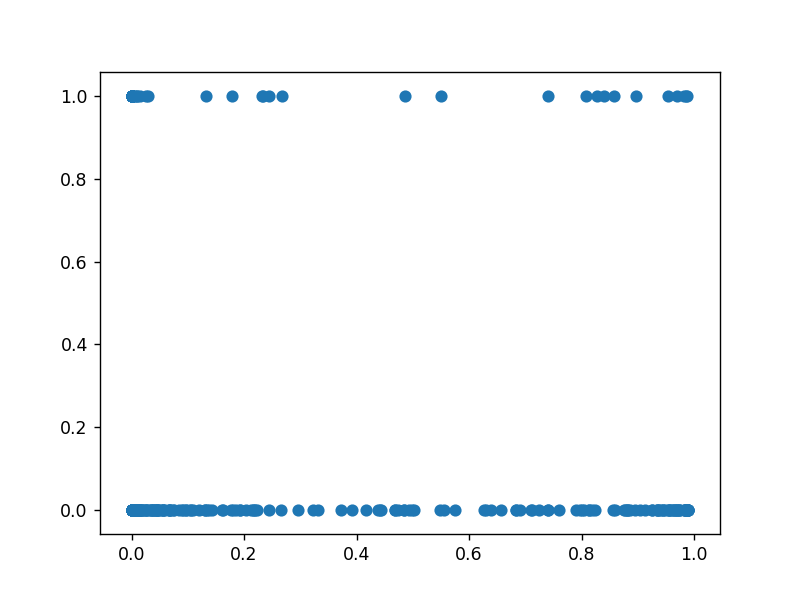

In [5]:
%matplotlib notebook
plt.scatter(rd._p, rd._data['z']);

In [ ]:
%matplotlib notebook
plt.hist(rd._data['z']);

## Fit the model

In [ ]:
rd.fit_ps(max_depth=12, n_estimators=1000)

## Out of bag scores and proximities.

In [ ]:
%matplotlib notebook

units='all'

prf = rd.ps_oob(units)
ppx = rd.ps_oob_prox(units)
#ppx /= np.max(ppx)

plt.hist(prf, color='blue', density=True);
#plt.hist(ppx, color='red', density=True);

# Differences

In [ ]:
y = rd['y']
z = rd['z']

In [ ]:
np.mean(y)

## Unweighted

In [ ]:
w = z + -1 * (1 - z)
np.sum(y * w) / len(y)

## ATT

In [ ]:
w = (z + -1 * (1 - z)) / prf
np.sum(y * z) / len(w)

## ATE

In [ ]:
z = rd['z']
w = z / prf - (1-z) / (1-prf)
w[np.abs(w) > 1e6] = 0 # get rid of infs
n_nans = np.sum(np.isnan(w))
w[np.isnan(w)] = 0 # get rid of nans
np.sum(y*w) / (len(w) - n_nans)

## Weighted using on OOB scores

In [ ]:
(np.sum(ppx[rd.treated] * y[rd.treated])) / np.sum(ppx[rd.treated])- (np.sum(ppx[rd.nottreated] * y[rd.nottreated])) / np.sum(ppx[rd.nottreated])

## Weighted using on proximities

In [ ]:

(np.sum(prf[rd.treated] * y[rd.treated])) / sum(prf[rd.treated]) - (np.sum(prf[rd.nottreated] * y[rd.nottreated])) / np.sum(prf[rd.nottreated])